In [2]:
using LinearAlgebra
using PyPlot

Solving environment: ...working... done

## Package Plan ##

  environment location: /root/.julia/conda/3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h4e544f5_7          18 KB  conda-forge
    brotli-bin-1.0.9           |       h4e544f5_7          19 KB  conda-forge
    cycler-0.11.0              |     pyhd8ed1ab_0          10 KB  conda-forge
    fonttools-4.32.0           |   py39h0fd3b05_0         1.6 MB  conda-forge
    freetype-2.10.4            |       hdf53a3c_1         988 KB  conda-forge
    giflib-5.2.1               |       hb9de7d4_2          78 KB  conda-forge
    jbig-2.1                   |    hf897c2e_2003          44 KB  conda-forge
    jpeg-9e                    |       h3557bc0_0         438 KB  conda-forge
    kiwisolver-1.4.2           |   py39h110580c_1          75 KB  conda-forge
   

┌ Info: Installing matplotlib via the Conda matplotlib package...
└ @ PyCall /root/.julia/packages/PyCall/7a7w0/src/PyCall.jl:711
┌ Info: Running `conda install -y matplotlib` in root environment
└ @ Conda /root/.julia/packages/Conda/x2UxR/src/Conda.jl:127


## 行列の正定値性

In [3]:
n = 3
B = randn(3, 3)
A = B'B
λs, vs = eigvals(A), eigvecs(A)
println("eigen values:\n", λs, "\n\neigen vectors:\n", vs)

eigen values:
[0.04621623762582466, 1.9241150699862415, 6.861301394210249]

eigen vectors:
[-0.5139137680110449 0.7909779356313867 0.3320339506631807; -0.29873467456062763 0.19781373415625336 -0.9336098332785033; 0.804145654259131 0.5789850014667642 -0.13463333470090383]


In [4]:
S = []
for i in 1:10
    z = randn(n)
    y = z'*A*z
    push!(S, y)
end
print(S)

Any[4.001470414070778, 2.250311555342311, 0.41261072535422627, 0.6093806158325517, 12.272588540779195, 4.320115658132576, 2.9684728293678355, 5.00764903112451, 23.52097040175253, 3.421383624109762]

## カーネル

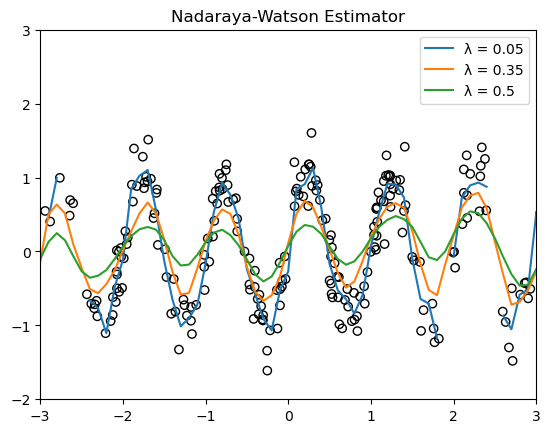

In [8]:
n = 250
x = 2randn(n)
y = sin.(2π*x) .+ randn(n)./4

D(t) = max(0.75(1 - t^2), 0)
k(x, y, λ) = D(abs(x - y) / λ)
f(z, λ) = sum(k.(x, z, λ) .* y) / sum(k.(x, z, λ))

fig, ax = subplots()
ax.set_xlim(-3, 3); ax.set_ylim(-2, 3)
ax.scatter(x, y, facecolors="none", edgecolors="k", marker="o")

xs = -3:0.1:3
λs = [0.05, 0.35, 0.50]
for λ in λs
    ax.plot(xs, f.(xs, λ), label="λ = $(λ)")
end
ax.legend()
ax.set_title("Nadaraya-Watson Estimator")
show()

## 正定値カーネル

Best σ² = 0.015


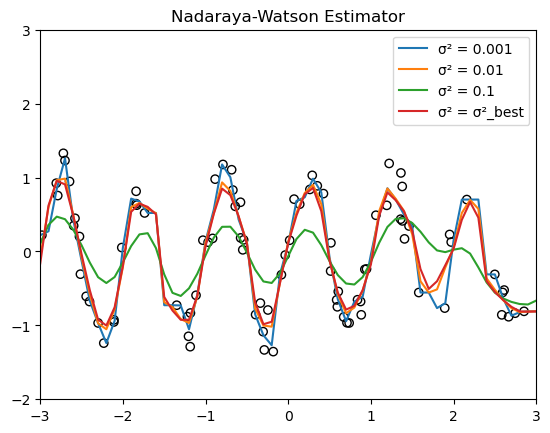

In [132]:
n = 100
x = 2randn(n)
y = sin.(2π*x) .+ randn(n) ./ 4 # データ生成

K(x, y, σ²) = exp(-(x - y)^2 / σ²)

f(z, σ²) = sum(K.(x, z, σ²) .* y) / sum(K.(x, z, σ²))

# σ² = 0.01, 0.001の曲線の図示
fig, ax = subplots()
ax.scatter(x, y, facecolor="none", edgecolors="k", marker="o")
ax.set_xlim(-3, 3); ax.set_ylim(-2, 3)

xs = -3:0.1:3
σ²s = [0.001, 0.01, 0.1]

for σ² in σ²s
    ax.plot(xs, f.(xs, σ²), label="σ² = $(σ²)")
end
ax.set_title("Nadaraya-Watson Estimator")

# 最適なσ²の値の計算
m = round(n / 10)
σ²s = 0.001:0.001:0.1
mse_min = Inf
σ²_best = 0
for σ² in σ²s
    mse = 0
    for k in 1:10
        x_test = x[Int(1+m*(k-1)):Int(m*k)]
        y_test = y[Int(1+m*(k-1)):Int(m*k)]
        x_train = [xx for xx in x if xx ∉ x_test]
        y_train = [yy for yy in y if yy ∉ y_test]
        
        f_cv(z) = sum(K.(x_train, z, σ²) .* y_train) / sum(K.(x_train, z, σ²))
        
        mse = isnan(sum((y_test .- f_cv.(x_test)).^2)) ? mse : mse + sum((y_test .- f_cv.(x_test)).^2)
    end
    if mse < mse_min
        mse_min = mse
        σ²_best = σ²
    end
end
println("Best σ² = $(σ²_best)")

ax.plot(xs, f.(xs, σ²_best), label="σ² = σ²_best")
ax.legend()
show()